In [10]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from minimax_agent import MinimaxAgent
from expectimax_agent import ExpectimaxAgent
from play import play_vs_other_agent
from UONI import UONI

In [2]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()

Input Agents

In [3]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [4]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   |     | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   |     | O   | O   | O   | O   |     | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

2

Random Agent vs UONI (Universal Optimization Neural Interface)

In [16]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:01<00:00, 19.24it/s]


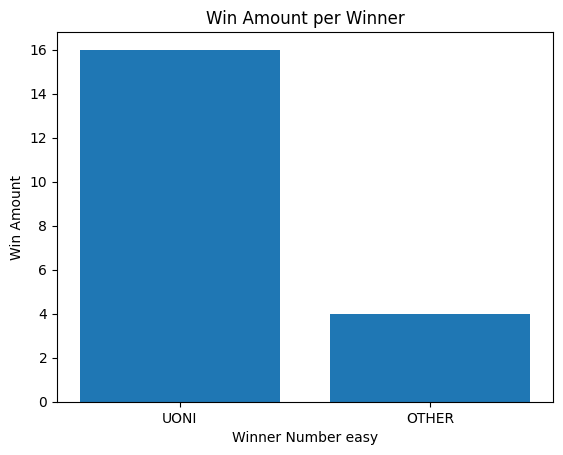

100%|██████████| 20/20 [00:01<00:00, 12.72it/s]


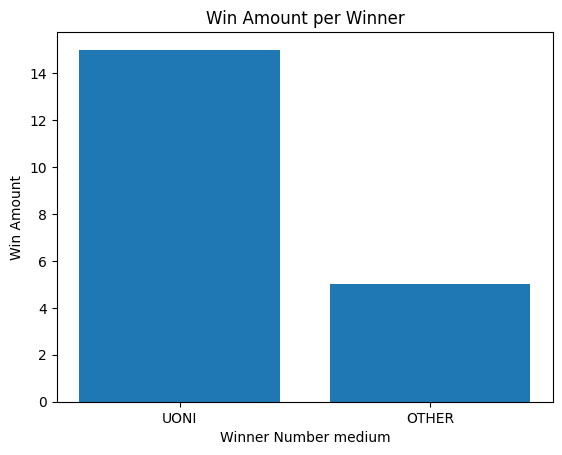

100%|██████████| 20/20 [00:01<00:00, 10.74it/s]


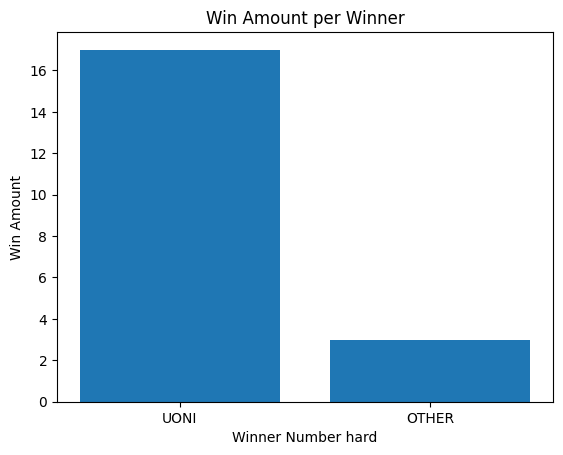

In [18]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=RandomAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=RandomAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

Minimax

In [7]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=MinimaxAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 |     | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [8]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def minimax_graph(ws, level):
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:01<00:00, 15.16it/s]


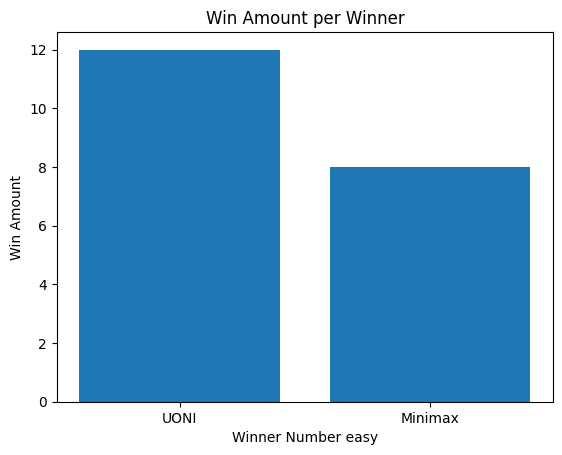

100%|██████████| 20/20 [00:02<00:00,  8.11it/s]


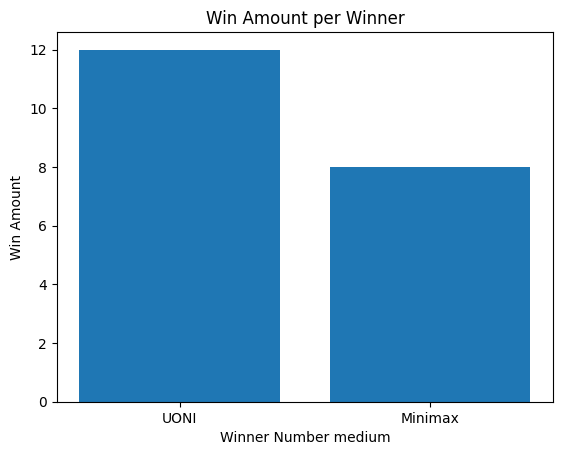

100%|██████████| 20/20 [00:03<00:00,  5.25it/s]


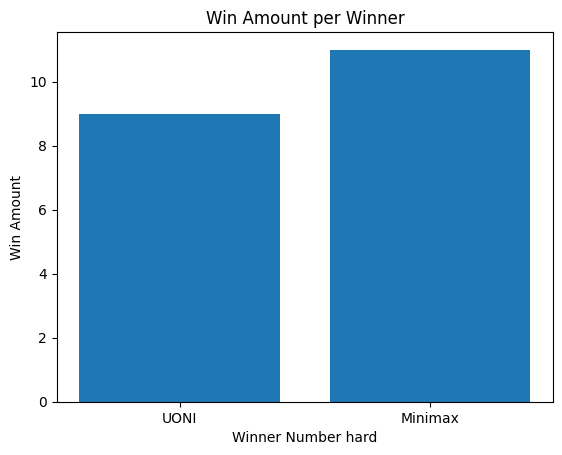

In [9]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=MinimaxAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=MinimaxAgent(1), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

Expectimax

In [11]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=ExpectimaxAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   |     | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   |     | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [12]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def expectimax_graph(ws, level):
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:01<00:00, 15.70it/s]


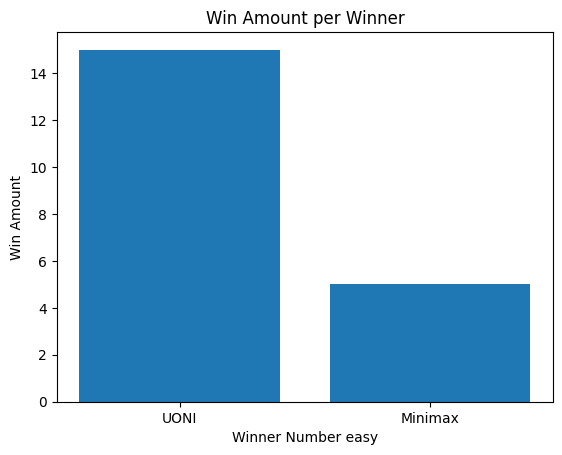

100%|██████████| 20/20 [00:02<00:00,  8.39it/s]


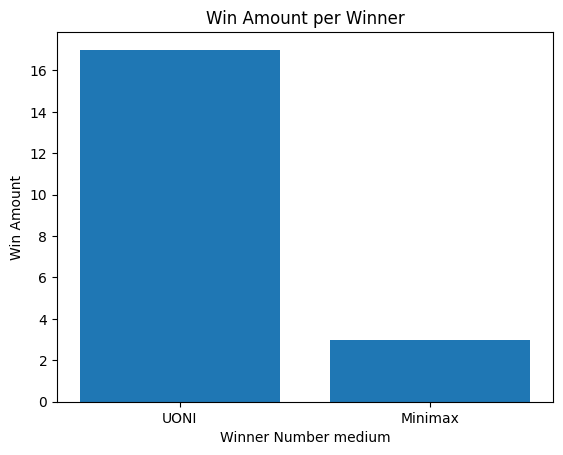

100%|██████████| 20/20 [00:03<00:00,  5.91it/s]


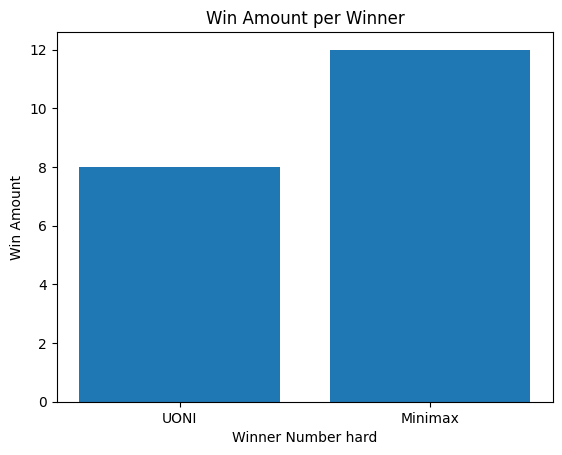

In [13]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=UONI(2, level), render=False))
    expectimax_graph(ws[level], level)

Expectimax VS Minimax

In [25]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def minimaxVSexpectimax_graph(ws):
    winners = ["Minimax", "Expectimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner')
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 100/100 [00:00<00:00, 605.91it/s]


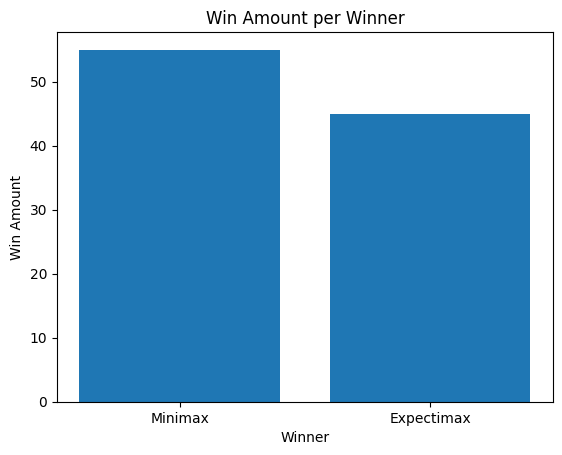

In [29]:
from tqdm import tqdm
data = []
for i in tqdm(range(100)):
    if i%2 == 0:
        data.append(play_vs_other_agent(env, agent1=MinimaxAgent(1), agent2=ExpectimaxAgent(2), render=False))
    else:
        data.append(play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=MinimaxAgent(2), render=False))
minimaxVSexpectimax_graph(data)